In [1]:
import pandas as pd
import numpy as np
DATA_DIR = "../../datasets/airbus-ship-detection"
SEGMENTATION = DATA_DIR + '/train_ship_segmentations_v2.csv'
anns = pd.read_csv(SEGMENTATION)
anns.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


Now we know that there are images of the same ships just shifted in x and or y.
So we must scan the dataset for the multiple instances. To start with I am going to remove the duplicates.

In [2]:
s = anns['EncodedPixels'][3].split()
starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]

In [3]:
print(lengths)

[ 1  4  5  8 10 10  9 10 10  9  9 10 10  9  9  9 10  9  9  7  6  3  1]


In [4]:
type(anns['EncodedPixels'])    

pandas.core.series.Series

In [28]:
s = anns['EncodedPixels']

In [33]:
def bashit(x):
    try:
        a = x.split()
    except:
        return([0])
    lengths = a[1:][::2]
    return(lengths)

anns['MaskLengths'] = s.apply(bashit)

In [36]:
anns.head()

,ImageId,EncodedPixels,MaskLengths,liststring
0,00003e153.jpg,NaN,[0],0
1,0001124c7.jpg,NaN,[0],0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,"[17, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 3...","17,33,33,33,33,33,33,33,33,33,33,33,33,33,33,3..."
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,"[1, 4, 5, 8, 10, 10, 9, 10, 10, 9, 9, 10, 10, ...","1,4,5,8,10,10,9,10,10,9,9,10,10,9,9,9,10,9,9,7..."
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,"[9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, ...","9,9,9,9,9,7,7,7,7,7,7,7,9,9,9,9,9,9"


In [35]:
anns['liststring'] = [','.join(map(str, l)) for l in anns['MaskLengths']]

In [32]:
type(anns['MaskLengths'])

pandas.core.series.Series

In [37]:
anns['Dup'] = anns['liststring'].duplicated()

In [44]:
anns[(anns['Dup']) & (anns['liststring']!='0')].head()

,ImageId,EncodedPixels,MaskLengths,liststring,Dup
333,0062ad143.jpg,267882 6 268650 6 269418 6 270186 6 270954 6 2...,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","6,6,6,6,6,6,6,6,6,6,6,6,6,6",True
999,012735107.jpg,68791 1 69558 4 70326 5 71093 7 71860 10 72628...,"[1, 4, 5, 7, 10, 11, 11, 12, 11, 11, 12, 12, 1...","1,4,5,7,10,11,11,12,11,11,12,12,11,12,12,11,11...",True
1108,0148e8c38.jpg,25288 2 26056 3 26823 3 27591 3 28358 3 29127 1,"[2, 3, 3, 3, 3, 1]","2,3,3,3,3,1",True
1128,014f2454d.jpg,219451 1 220218 3 220985 5 221754 4 222523 4 2...,"[1, 3, 5, 4, 4, 5, 3, 1]","1,3,5,4,4,5,3,1",True
1203,015d9f6b2.jpg,472677 6 473440 11 474208 11 474976 11 475744 ...,"[6, 11, 11, 11, 12, 11, 11, 11, 11, 11, 11, 11...","6,11,11,11,12,11,11,11,11,11,11,11,12,11,11,11...",True


In [52]:
anns[anns['liststring']=='6,6,6,6,6,6,6,6,6,6,6,6,6,6'].head()

,ImageId,EncodedPixels,MaskLengths,liststring,Dup
292,0056d301c.jpg,267626 6 268394 6 269162 6 269930 6 270698 6 2...,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","6,6,6,6,6,6,6,6,6,6,6,6,6,6",False
333,0062ad143.jpg,267882 6 268650 6 269418 6 270186 6 270954 6 2...,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","6,6,6,6,6,6,6,6,6,6,6,6,6,6",True
6036,06965926a.jpg,446093 6 446861 6 447629 6 448397 6 449165 6 4...,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","6,6,6,6,6,6,6,6,6,6,6,6,6,6",True
11365,0c5f2d790.jpg,565826 6 566594 6 567362 6 568130 6 568898 6 5...,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","6,6,6,6,6,6,6,6,6,6,6,6,6,6",True
12220,0d5a84689.jpg,172098 6 172866 6 173634 6 174402 6 175170 6 1...,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","6,6,6,6,6,6,6,6,6,6,6,6,6,6",True


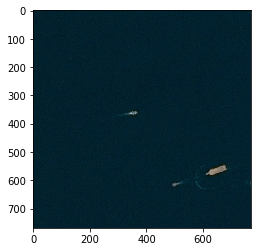

In [53]:
from matplotlib import pyplot
image_path = '../../datasets/airbus-ship-detection/train_v2/'
imageid = '0056d301c.jpg'
image = pyplot.imread(image_path+imageid)
pyplot.imshow(image)
pyplot.show()

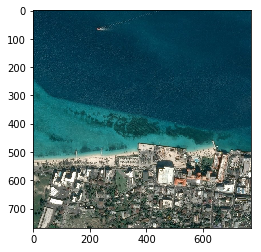

In [57]:
from matplotlib import pyplot
image_path = '../../datasets/airbus-ship-detection/train_v2/'
imageid = '0d5a84689.jpg'
image = pyplot.imread(image_path+imageid)
pyplot.imshow(image)
pyplot.show()

Well I seems that the mask shape by itself is not good enough to exclude translated images of the same boats.
But... does this really matter? Perhaps it is like image aug anyway.

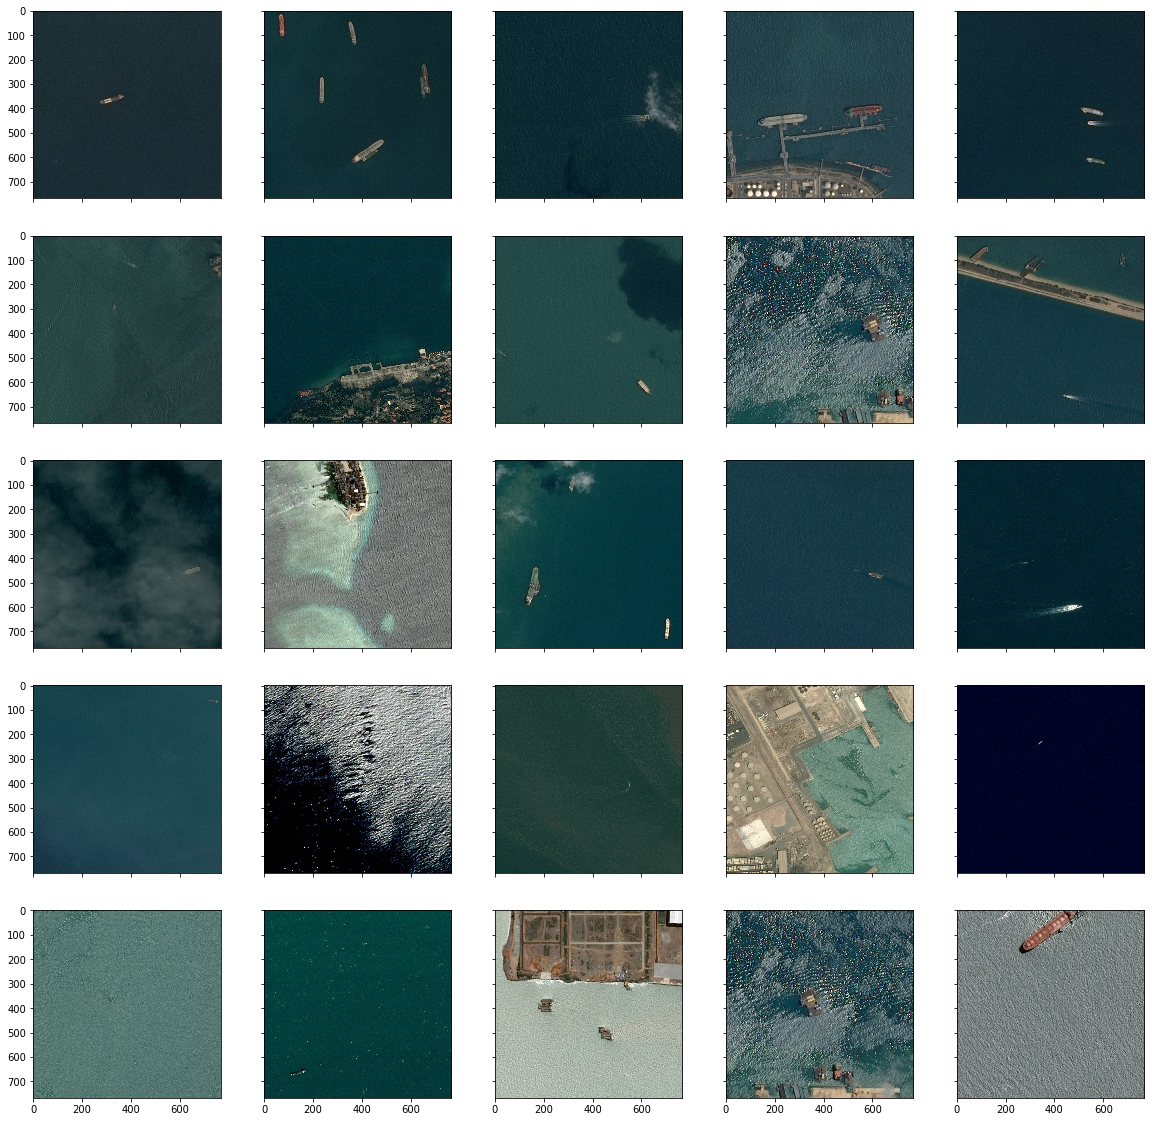

In [63]:
from pathlib import Path
sample = anns[~anns.EncodedPixels.isna()].sample(25)
fig, ax = pyplot.subplots(5, 5, sharex='col', sharey='row')
fig.set_size_inches(20, 20)
image_path = '../../datasets/airbus-ship-detection/train_v2'

for i, imgid in enumerate(sample.ImageId):
    col = i % 5
    row = i // 5
    
    path = Path(image_path) / '{}'.format(imgid)
    img = pyplot.imread(path)
    
    ax[row, col].imshow(img)
